## Challenge: Crowd (Object) Counting

<img src="http://personal.ie.cuhk.edu.hk/~ccloy/images/shopping_mall_annotated.jpg" title="Crowd Counting" width="30%"/>

Para esta sección final se evaluará todo lo que han aprendido a través de un desafío en donde puedan competir y medir sus resultados *in time* en la plataforma de __[Kaggle](https://www.kaggle.com/)__. El problema y todo su detalle puede ser encontrado en la página de la competencia a través del siguiente link:


<center><H2> __[Competencia Object Counting](https://www.kaggle.com/t/59c93ca0e8ae47999f9287a5751d6402)__ </H2></center>



Para esto deberán crearse una cuenta en la plataforma *Kaggle* y subir sus respuestas a ésta. Por favor crearse nombres que sean fácil identificar después para saber quién fue quién, sino no podrán tener la nota (o en el correo de entrega ponen cual es su nombre de usuario en la competencia).

*Nota: El puntaje que entregará al estar participando en la competencia (menos de 2 puntos al *benchmark* que se presenta) y el lugar obtenido se presenta en la página de Kaggle.*

> Las entregas en *csv* pueden ser generadas de la siguiente manera:
```python
import pandas as pd
d = {'id': test_ids, 'count': prediction_test}
entrega = pd.DataFrame(data=d,columns=['id','count'])
entrega.to_csv('mysubmission.csv', index=False)
```

> Los archivos binarios de numpy pueden ser cargados facilmente con el siguiente comando:
```python
import numpy as np
dato = np.load('binary_file.npy')
```

> Las imagenes en python pueden ser cargadas con la librería Pillow y transformadas a numpy array con el siguiente comando:
```python
from PIL import Image
img = Image.open("path/to/image.jpg or png")
np.asarray(img)
```

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmp8v7am62z/pubring.gpg' created
gpg: /tmp/tmp8v7am62z/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [1]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import *
from keras.models import Model,Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, rmsprop

Using TensorFlow backend.


In [3]:
!ls drive/Redes\ neuronales/Tarea\ 3

frames_train	 images_train.npy  Pregunta 2.ipynb
images_test.npy  labels_train.csv  Pregunta 3.ipynb


## Datos

In [5]:
img = Image.open("drive/Redes neuronales/Tarea 3/frames_train/seq_000401.jpg")
np.asarray(img)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[150, 118,  95],
        [150, 118,  95],
        [150, 118,  95],
        ...,
        [203, 158, 117],
        [206, 161, 119],
        [206, 162, 117]],

       [[151, 119,  96],
        [151, 119,  96],
        [151, 119,  96],
        ...,
        [185, 140,  99],
        [189, 144, 102],
        [191, 147, 102]],

       [[149, 117,  94],
        [149, 117,  94],
        [149, 117,  94],
        ...,
        [170, 125,  84],
        [170, 125,  83],
        [170, 126,  81]]

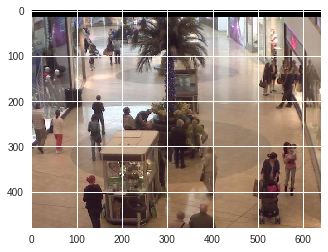

In [7]:
plt.imshow(img)
plt.show()

In [0]:
train = np.load('drive/Redes neuronales/Tarea 3/images_train.npy')

In [0]:

test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')

In [9]:
!ls drive/Redes\ neuronales/Tarea\ 3/

frames_train	 images_train.npy  Pregunta 2.ipynb
images_test.npy  labels_train.csv  Pregunta 3.ipynb


In [0]:
df_y = pd.read_csv('drive/Redes neuronales/Tarea 3/labels_train.csv')

In [11]:
df_y.describe()

,id,count
count,1600.00000,1600.000000
mean,1200.50000,31.070625
std,462.02453,6.992134
min,401.00000,13.000000
25%,800.75000,26.000000
50%,1200.50000,30.000000
75%,1600.25000,35.000000
max,2000.00000,50.000000


In [10]:
df_y.head()

,id,count
0,401,29
1,402,30
2,403,31
3,404,26
4,405,26


In [11]:
print(train.shape)
print(test.shape)

(1600, 480, 640, 3)
(400, 480, 640, 3)


In [0]:
idx_test = np.random.choice(np.arange(len(train)), 400, replace=False)
mask_test = np.zeros(len(train),dtype=bool) 
mask_test[idx_test] = True 

n_train = 800
#ny_train = 

X_train = train[~mask_test][:n_train].astype('float32')
Y_train = df_y['count'].values[~mask_test][:n_train]
X_val = train[mask_test].astype('float32')
Y_val = df_y['count'].values[mask_test]

In [0]:

X_train /= 255.0
#Y_train = to_categorical(Y_train, num_classes=51)

In [0]:
#norm
X_val /= 255.0
#Y_val = to_categorical(Y_val, num_classes=51)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(800, 480, 640, 3)
(800,)
(400, 480, 640, 3)
(400,)


In [0]:

print(X_test.shape)

In [14]:
train[0][0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

## Arquitectura

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='sigmoid')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2)) 

#tercera capa
#aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(BatchNormalization())
#aux.add(MaxPooling2D(2,2)) 

model.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))


model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

model malos resultados, muy malos

In [15]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2,activation='softmax'))
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 480, 640, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 320, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1228800)           0         
__________

In [0]:
#train it
#optimizer_ = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model2.fit(X_train, Y_train, batch_size=128,epochs=15,verbose=1, validation_data=(X_val,Y_val))

Train on 1300 samples, validate on 300 samples
Epoch 1/15


model2 ño

In [10]:
opt = rmsprop()
batch_size = 10
epochs = 25

model3 = Sequential()
model3.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
#model3.add(Dense(512,activation='relu'))
model3.add(Dense(10,activation='relu'))
model3.add(Dense(1,activation='linear'))

model3.compile(optimizer=opt,loss="mse")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 480, 640, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 240, 320, 32)      18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 240, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 120, 160, 32)      0         
__________

In [12]:
hist_m3 = model3.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 800 samples, validate on 400 samples
Epoch 1/25
800/800 [==============================] - 94s 118ms/step - loss: 422.1041 - val_loss: 427.2658
Epoch 2/25
800/800 [==============================] - 88s 110ms/step - loss: 132.4497 - val_loss: 48.0108
Epoch 3/25
800/800 [==============================] - 88s 110ms/step - loss: 88.8760 - val_loss: 59.4795
Epoch 4/25
800/800 [==============================] - 88s 110ms/step - loss: 71.4008 - val_loss: 110.4179
Epoch 5/25
800/800 [==============================] - 88s 110ms/step - loss: 59.4453 - val_loss: 35.2457
Epoch 6/25
800/800 [==============================] - 88s 110ms/step - loss: 57.4961 - val_loss: 45.7613
Epoch 7/25
800/800 [==============================] - 88s 110ms/step - loss: 215.3988 - val_loss: 64.8588
Epoch 8/25
800/800 [==============================] - 88s 110ms/step - loss: 34.1773 - val_loss: 20.4548
Epoch 9/25
800/800 [==============================] - 88s 111ms/step - loss: 36.0823 - val_loss: 16.6851
Epoc

model3 mejorando... parece~~

In [0]:
model3.save("drive/Redes neuronales/Tarea 3/m3.h5")

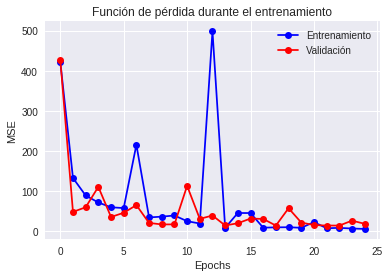

In [16]:
plt.plot(range(epochs), hist_m3.history['loss'], 'bo-', label = 'Entrenamiento')
plt.plot(range(epochs), hist_m3.history['val_loss'], 'ro-', label = 'Validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
pred_m3 = model3.predict(X_train[:20]) 

In [20]:
pred_m3

array([[27.55176 ],
       [28.801653],
       [24.559893],
       [24.650225],
       [25.535933],
       [26.349865],
       [28.558277],
       [34.851006],
       [33.81912 ],
       [38.339577],
       [36.865234],
       [39.319733],
       [33.08564 ],
       [32.679066],
       [36.416897],
       [34.53402 ],
       [39.045116],
       [33.376648],
       [40.836884],
       [36.022575]], dtype=float32)

In [22]:
Y_train[:20]

array([29, 31, 26, 26, 28, 27, 31, 37, 37, 41, 40, 42, 36, 37, 38, 37, 40,
       37, 41, 37])

In [0]:
test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')

In [0]:
test = test.astype('float32')

In [0]:
test /= 255.0

In [0]:
y_pred_m3 = model3.predict(test) 

In [29]:
y_pred_m3

array([[28.620975],
       [33.943134],
       [35.804096],
       [31.226292],
       [36.233475],
       [33.861343],
       [31.40075 ],
       [31.352638],
       [24.411125],
       [25.030483],
       [21.5725  ],
       [19.499924],
       [21.114452],
       [23.490452],
       [16.83248 ],
       [17.757652],
       [16.025177],
       [22.793606],
       [26.690033],
       [25.315105],
       [26.822224],
       [21.507145],
       [24.21297 ],
       [22.128227],
       [22.038546],
       [22.334044],
       [23.765635],
       [19.743666],
       [24.829838],
       [22.877352],
       [23.662052],
       [24.832804],
       [21.47552 ],
       [19.73273 ],
       [17.575193],
       [21.549496],
       [25.260944],
       [22.134514],
       [22.635584],
       [26.537497],
       [25.602686],
       [21.19317 ],
       [19.208853],
       [18.55799 ],
       [25.338284],
       [24.79763 ],
       [21.054749],
       [22.538132],
       [22.650618],
       [25.926855],


In [0]:
test_ids = np.array(range(1,401))

In [0]:
prediction_test = np.concatenate(np.round(y_pred_m3))

In [36]:
print(test_ids.shape)
print(prediction_test.shape)
print(y_pred_m3.shape)

(400,)
(400,)
(400, 1)


In [0]:
d = {'id': test_ids, 'count': prediction_test}
entrega = pd.DataFrame(data=d,columns=['id','count'])
entrega.to_csv('drive/Redes neuronales/Tarea 3/mysubmission.csv', index=False)